Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# collecting data from previous steps
vancouver_stations_df = pd.read_pickle('vancouver_stations.pkl')
yelp_places_df = pd.read_pickle('yelp_places.pkl')

In [14]:
#rename latitude and longitude columns in citybike dataframe
vancouver_stations_df.rename(columns={"latitude": "Latitude", "longitude": "Longitude"}, inplace=True)

#join yelp and citybike dataframes
citybike_yelp_df = pd.merge(vancouver_stations_df, yelp_places_df, on=["Latitude", "Longitude"], how="outer")
citybike_yelp_df.to_pickle('joined_citybike_yelp.pkl')
citybike_yelp_df.head(10)



,Latitude,Longitude,free_bikes,empty_slots,slots,uid,Name,Category,Rating,Review Count,Address,Phone,Website,Price Range,Photos
0,49.291909,-123.140713,13,5,18,0092,Mr Greek Donair kabab,"Greek, Kebab, Halal",5.0,5,1206 Davie Street,+16043310697,https://www.yelp.com/biz/mr-greek-donair-kabab...,Not available,https://s3-media1.fl.yelpcdn.com/bphoto/vqHL-8...
1,49.291909,-123.140713,13,5,18,0092,"Under the Piano - Sound Spa for Body, Mind & Soul",Performing Arts,5.0,9,1350 Broughton Street,+16046623053,https://www.yelp.com/biz/under-the-piano-sound...,Not available,https://s3-media1.fl.yelpcdn.com/bphoto/LdsapS...
2,49.291909,-123.140713,13,5,18,0092,Lucifer's House of Heat,"Specialty Food, Sandwiches, Chicken Wings",4.9,9,1682 Davie Street,+12364298641,https://www.yelp.com/biz/lucifers-house-of-hea...,Not available,https://s3-media2.fl.yelpcdn.com/bphoto/LE9PXZ...
3,49.291909,-123.140713,13,5,18,0092,Perfecto Cafe,"Cafes, Patisserie/Cake Shop, Sandwiches",4.9,8,1502 Robson Street,,https://www.yelp.com/biz/perfecto-cafe-vancouv...,Not available,https://s3-media2.fl.yelpcdn.com/bphoto/QD1SJY...
4,49.291909,-123.140713,13,5,18,0092,Beaver Lake,"Parks, Lakes",4.9,7,Stanley Park,,https://www.yelp.com/biz/beaver-lake-vancouver...,Not available,https://s3-media3.fl.yelpcdn.com/bphoto/lX7vRO...
5,49.291909,-123.140713,13,5,18,0092,Vancouver Seawall,"Hiking, Parks",4.8,106,,,https://www.yelp.com/biz/vancouver-seawall-van...,Not available,https://s3-media2.fl.yelpcdn.com/bphoto/1NRnsZ...
6,49.291909,-123.140713,13,5,18,0092,Arike Restaurant,"African, Cocktail Bars, Canadian (New)",4.8,30,1725 Davie St,+16043369774,https://www.yelp.com/biz/arike-restaurant-vanc...,Not available,https://s3-media3.fl.yelpcdn.com/bphoto/FPcJuN...
7,49.291909,-123.140713,13,5,18,0092,Big Bang Sushi,"Japanese, Sushi Bars",4.8,30,1103 Denman St,+16043369622,https://www.yelp.com/biz/big-bang-sushi-vancou...,Not available,https://s3-media2.fl.yelpcdn.com/bphoto/z-cJ8n...
8,49.291909,-123.140713,13,5,18,0092,Ssong's Hotdog,"Fast Food, Hot Dogs, Korean",4.8,11,795 Jervis Street,+18774125904,https://www.yelp.com/biz/ssongs-hotdog-vancouv...,Not available,https://s3-media2.fl.yelpcdn.com/bphoto/YdN5yu...
9,49.291909,-123.140713,13,5,18,0092,Cheese Slap,"Poutineries, Burgers, Pizza",4.8,5,925 Granville Street,,https://www.yelp.com/biz/cheese-slap-vancouver...,Not available,https://s3-media3.fl.yelpcdn.com/bphoto/IJ9hUc...


In [18]:
# Replace missing addresses with 'Unknown'

citybike_yelp_df["Address"].fillna("Unknown", inplace=True)

In [16]:
# Convert price range to numeric values
price_mapping = {"$": 1, "$$": 2, "$$$": 3, "$$$$": 4, "Unknown": 0}
citybike_yelp_df["Price Range"] = citybike_yelp_df["Price Range"].map(price_mapping)

# Verify conversion
print(citybike_yelp_df["Price Range"].value_counts())

Price Range
2.0    1722
1.0     823
3.0     244
4.0      44
Name: count, dtype: int64


In [19]:
# Checking for duplicates

vancouver_stations_df.duplicated().sum()

0

Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

Text(0, 0.5, 'Frequency')

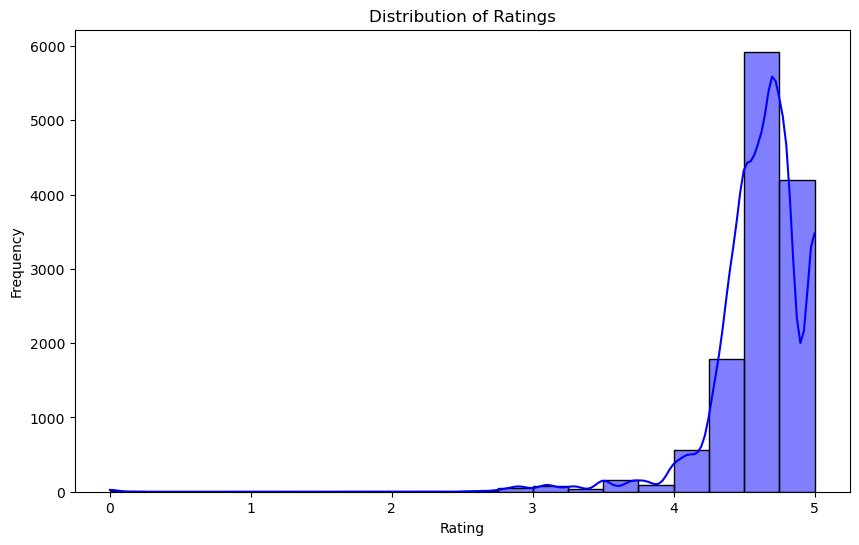

In [11]:
#distribution of ratings 

plt.figure(figsize=(10, 6))
sns.histplot(citybike_yelp_df['Rating'], bins=20, kde=True, color='blue')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')

Text(0, 0.5, 'Count')

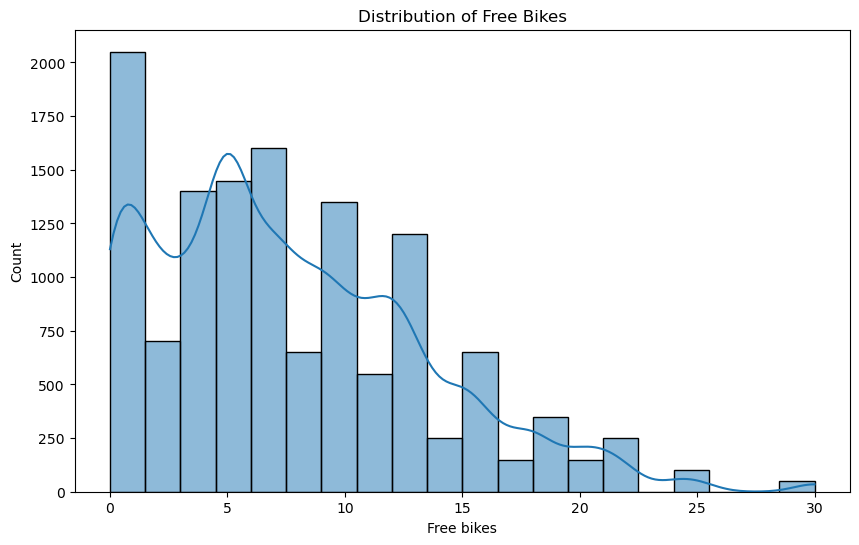

In [10]:
#histogram of available bikes

plt.figure(figsize=(10, 6))
sns.histplot(citybike_yelp_df['free_bikes'], kde=True, bins=20)
plt.title('Distribution of Free Bikes')
plt.xlabel('Free bikes')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

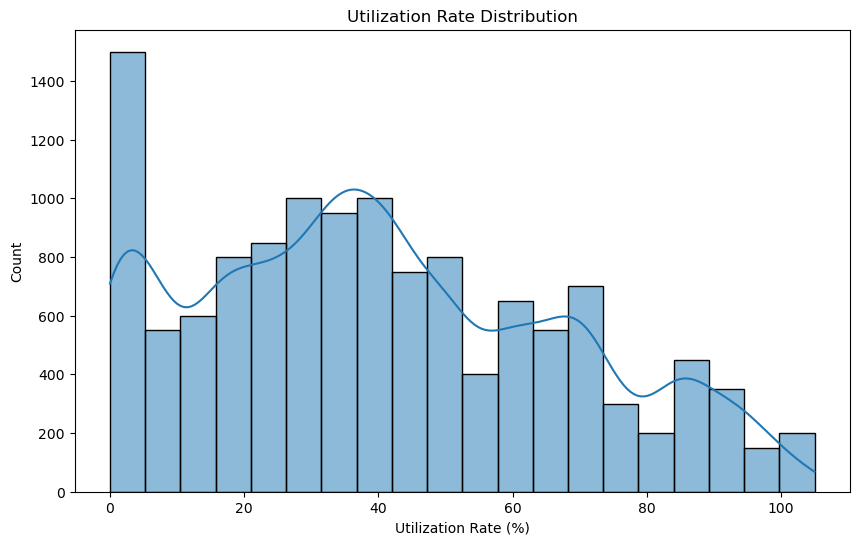

In [36]:
# Bikes Utilization Rate Distribution

plt.figure(figsize=(10, 6))
citybike_yelp_df["utilization_rate"] = citybike_yelp_df["free_bikes"] / citybike_yelp_df["slots"] * 100  # Calculate utilization rate
sns.histplot(citybike_yelp_df["utilization_rate"].dropna(), bins=20, kde=True)
plt.title("Utilization Rate Distribution")
plt.xlabel("Utilization Rate (%)")
plt.ylabel("Count")

Text(0, 0.5, 'Latitude')

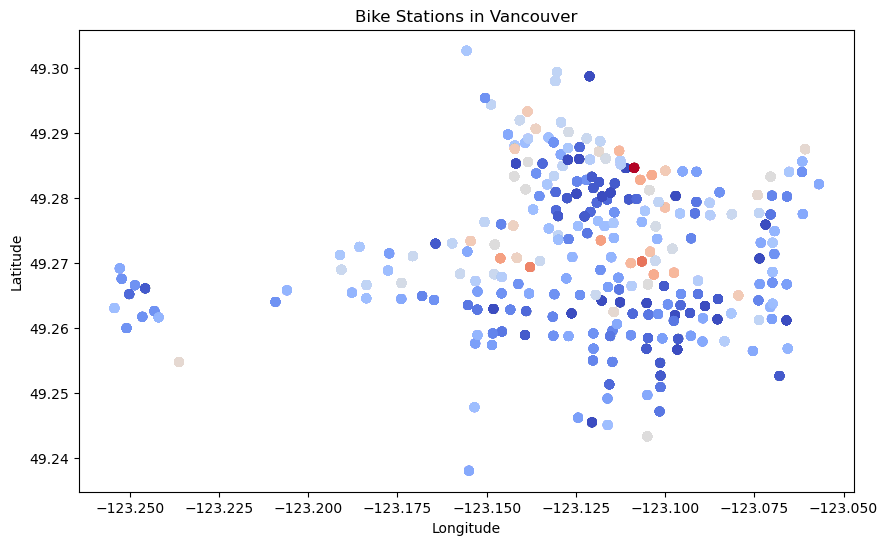

In [37]:
# Scatter Plot: Bike Station Locations

plt.figure(figsize=(10, 6))
plt.scatter(citybike_yelp_df["Longitude"], citybike_yelp_df["Latitude"], alpha=0.5, c=citybike_yelp_df["free_bikes"], cmap="coolwarm")
plt.title("Bike Stations in Vancouver")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

/var/folders/x6/k6smyqdj3lg6qmw8y7wds1jc0000gn/T/ipykernel_29721/2225617232.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.values, y=top_categories.index, palette="viridis")


Text(0, 0.5, 'POI Category')

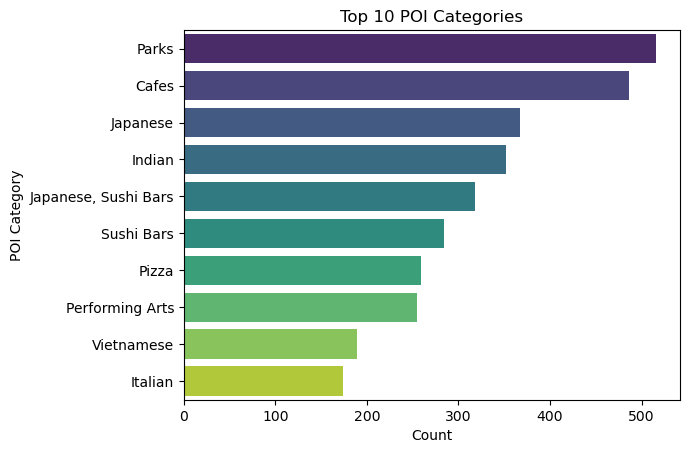

In [38]:
# Bar Chart: Top POI Categories

top_categories = citybike_yelp_df["Category"].value_counts().nlargest(10)
sns.barplot(x=top_categories.values, y=top_categories.index, palette="viridis")
plt.title("Top 10 POI Categories")
plt.xlabel("Count")
plt.ylabel("POI Category")

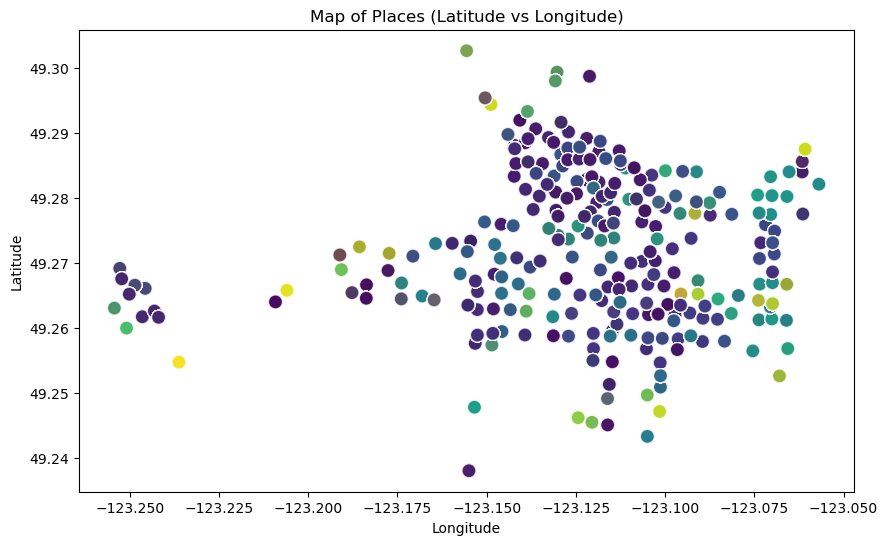

In [34]:
#Map of Latitude and Longitude

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Longitude', y='Latitude', data=citybike_yelp_df, hue='Category', palette='viridis', s=100, alpha=0.7, legend=False)
plt.title('Map of Places (Latitude vs Longitude)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

#plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

In [8]:
# 1.  heatmap of bike stations and nearby places
import folium
from folium.plugins import HeatMap

# Initialize a map
city_map = folium.Map(location=[49.2827, -123.1207], zoom_start=13)

# Add bike station and POI locations to the heatmap
heat_data = [[Latitude, Longitude] for Latitude, Longitude in zip(citybike_yelp_df['Latitude'], citybike_yelp_df['Longitude'])]
HeatMap(heat_data).add_to(city_map)

# Show map
#city_map

# 1.2. Add bike station and POI locations to the heatmap
heat_data = [[Latitude, Longitude] for Latitude, Longitude in zip(citybike_yelp_df['Latitude'], citybike_yelp_df['Longitude'])]
HeatMap(heat_data).add_to(city_map)

# Show map
#city_map

# 2. Clustered Map with Bike Stations and POIs

from folium.plugins import MarkerCluster

m = folium.Map(location=[49.2827, -123.1207], zoom_start=13)
marker_cluster = MarkerCluster().add_to(m)

for idx, row in citybike_yelp_df.iterrows():
    folium.Marker([row['Latitude'], row['Longitude']], popup=row['Category']).add_to(marker_cluster)

#m


# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [9]:
import sqlite3
import pandas as pd

# create SQLite database using data from Yelp and CityBike

# 1. Connect to the SQLite database (it will create a new database file if it doesn't exist)
conn = sqlite3.connect('citybike_yelp_data.db')  
cursor = conn.cursor()

# 2. Create a table to store the data 
cursor.execute('''
CREATE TABLE IF NOT EXISTS bike_yelp_data (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    Latitude REAL,
    Longitude REAL,
    free_bikes INTEGER,
    empty_slots INTEGER,
    slots INTEGER,
    uid INTEGER,
    Name TEXT,
    Category TEXT,
    Rating REAL,
    Review_Count INTEGER,
    Address TEXT,
    Phone TEXT,
    Website TEXT,
    Price Range TEXT,
    Photos TEXT
)
''')

# 3. Convert DataFrame to SQL table
citybike_yelp_df.to_sql('bike_yelp_data', conn, if_exists='replace', index=False)

# 4. Commit the transaction and close the connection
conn.commit()
conn.close()